# Gaussian model
Gaussian Model is a model based on the Bayes Theorem, so it's a pure probabilistic model, let see more about this model and the models based on Bayes Theorem

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, BayesianRidge, SGDRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import f1_score, classification_report, confusion_matrix, mean_absolute_error, mean_squared_error

## Dataset

In [2]:
df_hair = pd.read_csv('C:/Users/alberto.rubiales/PycharmProjects/Pycharm/Bayes-model/Factor-Hair-Revised.csv', sep=';')

In [3]:
df_hair[:5]

,Quality,Comunication,Hability,polite,Advertising,products,staff_image,price,Customer_care,order_billing,speed,Satisfaction
0,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7,8.2
1,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9,5.7
2,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5,8.9
3,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0,4.8
4,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5,7.1


In [4]:
train = df_hair.drop(columns=['Satisfaction'])
test = df_hair['Satisfaction']
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.20)

In [5]:
print('Min satisfaction:', test.min())
print('Max satisfaction:', test.max())

Min satisfaction: 4.7
Max satisfaction: 9.9


## Classification

### Hyperparameters
* priors: weights that we can pass to the algorithm in order to balance our dataset
* var_smoothing: is to solve the "Zero Probability Problem" (when we have 0 rows of one class) here the algorithm use Laplace Transformation, this rule assume that the dataset is large enough that adding one row of each class will not make a difference in the estimated probability.

First of all we need to create the classes, so we are going to create two classes of cliente, satisfy client and non satisfy client

(array([ 8., 14.,  7., 17., 14., 17., 10.,  7.,  5.,  1.]),
 array([4.7 , 5.22, 5.74, 6.26, 6.78, 7.3 , 7.82, 8.34, 8.86, 9.38, 9.9 ]),
 <a list of 10 Patch objects>)

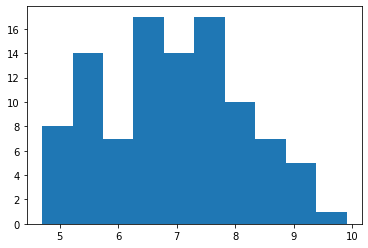

In [7]:
plt.hist(df_hair['Satisfaction'])

In [8]:
def satisfaction_classification(satisfaction):
    if satisfaction <=7:
        return 0 #user unsatisfy
    else:
        return 1 #user satisfy
    
df_hair['satisfaction_class'] = df_hair.apply(lambda x: satisfaction_classification(x['Satisfaction']), axis=1)

In [9]:
df_hair['satisfaction_class'].mean() #perfect we have a completly balanced dataset

0.5

In [10]:
train_2 = df_hair.drop(columns=['Satisfaction', 'satisfaction_class'])
test_2 = df_hair['satisfaction_class']
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(train_2, test_2, test_size=0.20)

In [11]:
#instance
nb = GaussianNB()

#train
nb.fit(X_train_2, y_train_2)

#train preds
preds_train = nb.predict(X_train_2)

#metrics classifications in train
print('CLASSIFICATION IN TRAIN')
print()
print('CONFUSION MATRIX:\n', confusion_matrix(preds_train, y_train_2))
print()
print('F1 SCORE:\n', f1_score(preds_train, y_train_2))
print()
print('CLASSIFICATION REPORT\n',classification_report(preds_train, y_train_2))

CLASSIFICATION IN TRAIN

CONFUSION MATRIX:
 [[27  2]
 [11 40]]

F1 SCORE:
 0.8602150537634408

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.71      0.93      0.81        29
           1       0.95      0.78      0.86        51

    accuracy                           0.84        80
   macro avg       0.83      0.86      0.83        80
weighted avg       0.86      0.84      0.84        80



In [12]:
#Classification in test
preds_trest = nb.predict(X_test_2)

#metrics classifications in train
print('CLASSIFICATION IN TEST')
print()
print('CONFUSION MATRIX:\n', confusion_matrix(preds_trest, y_test_2))
print()
print('F1 SCORE:\n', f1_score(preds_trest, y_test_2))
print()
print('CLASSIFICATION REPORT\n',classification_report(preds_trest, y_test_2))

CLASSIFICATION IN TEST

CONFUSION MATRIX:
 [[10  1]
 [ 2  7]]

F1 SCORE:
 0.823529411764706

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       0.88      0.78      0.82         9

    accuracy                           0.85        20
   macro avg       0.85      0.84      0.85        20
weighted avg       0.85      0.85      0.85        20



### Conclusion
Most of the time bayes based models do not give good results, that's because they're based on pure probabilities. Which means that this models assume that the features are independent of each other, this is an assumption that in real life normally is not true, because in real life, features are almost always dependent on each other, whether we know them or not.

**There is not a bayes model for regresion**, this is obvious because, bayes theorem only works with probabilitys, but there is implementations of bayes in some models. I was thinking in put the example of a Bayesian Ridge model, but i am not going to do because is not a bayesian model. It's actually a linear model that during the calculation of the results infers probabilities of the Betas based on a normal distribution, but as i said it's a Linear model, so for the avoidance of confusion, we're going to stay here.